<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Lie_Algebra_Geometric_Algebra_Quantum_Phenomena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

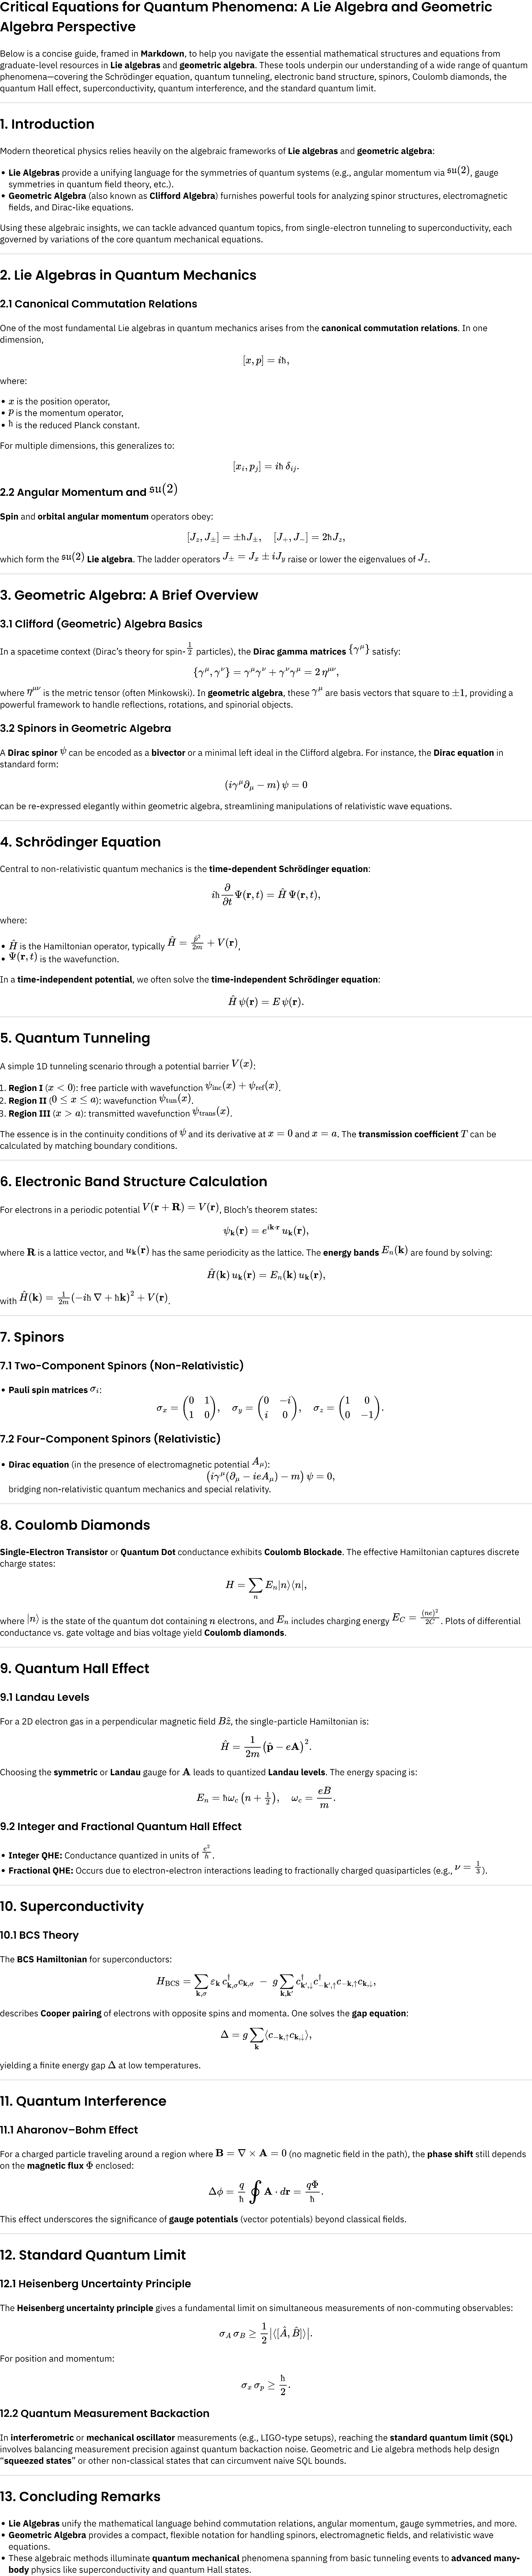

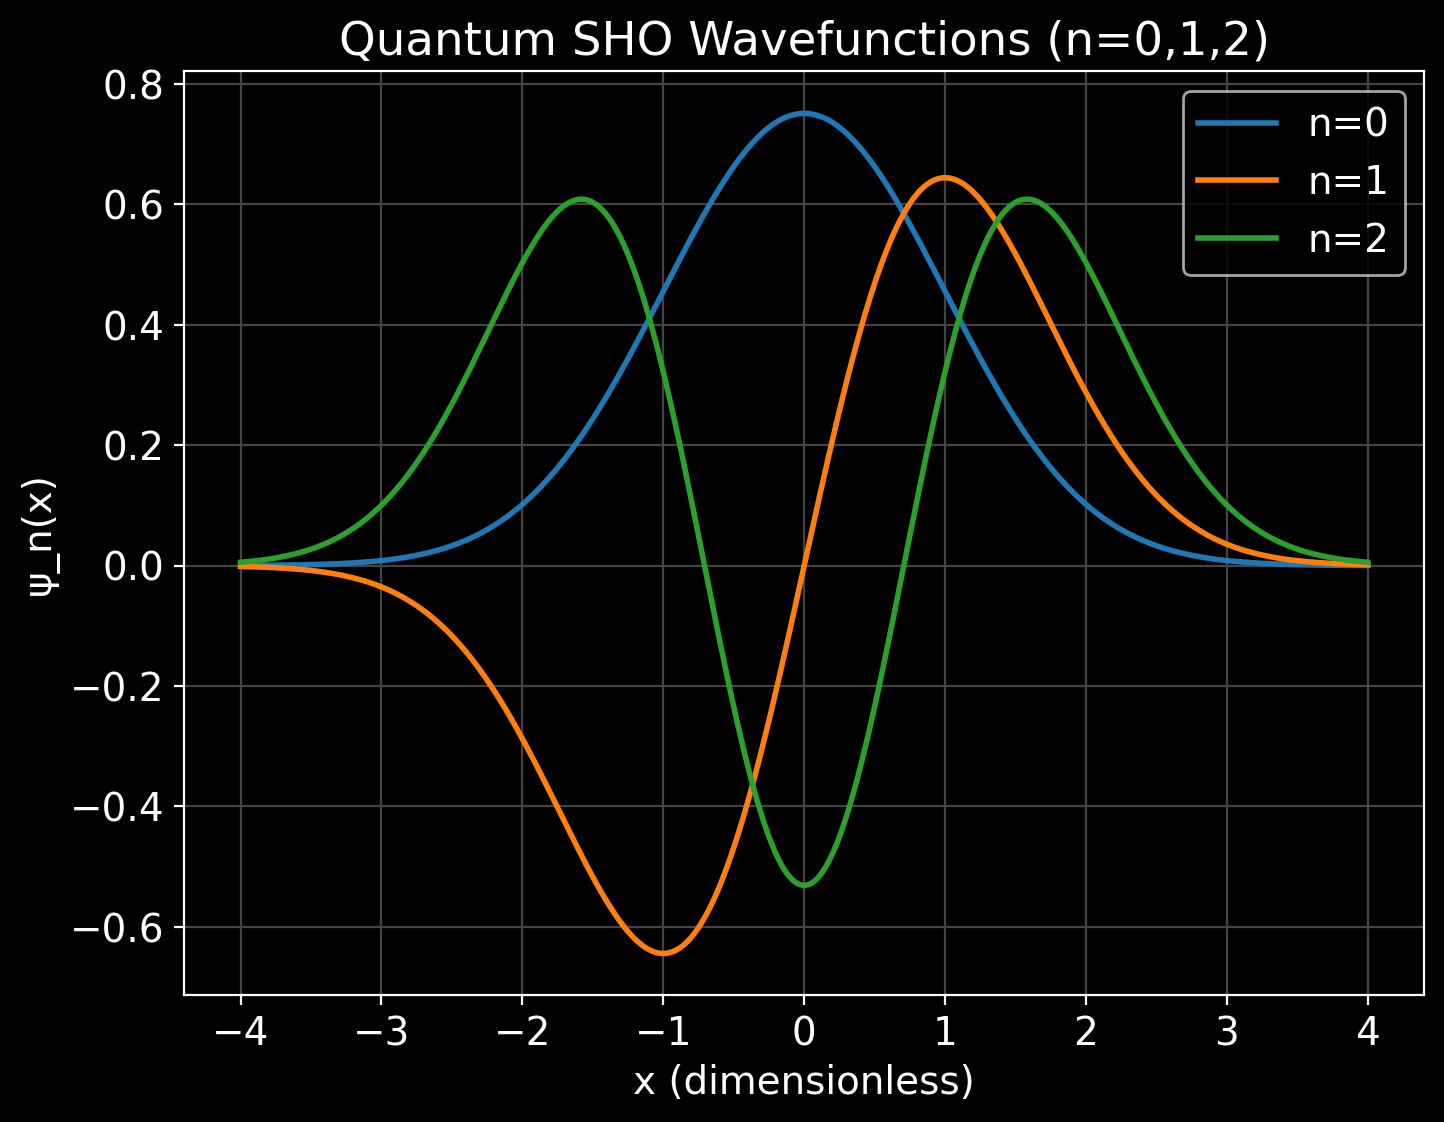

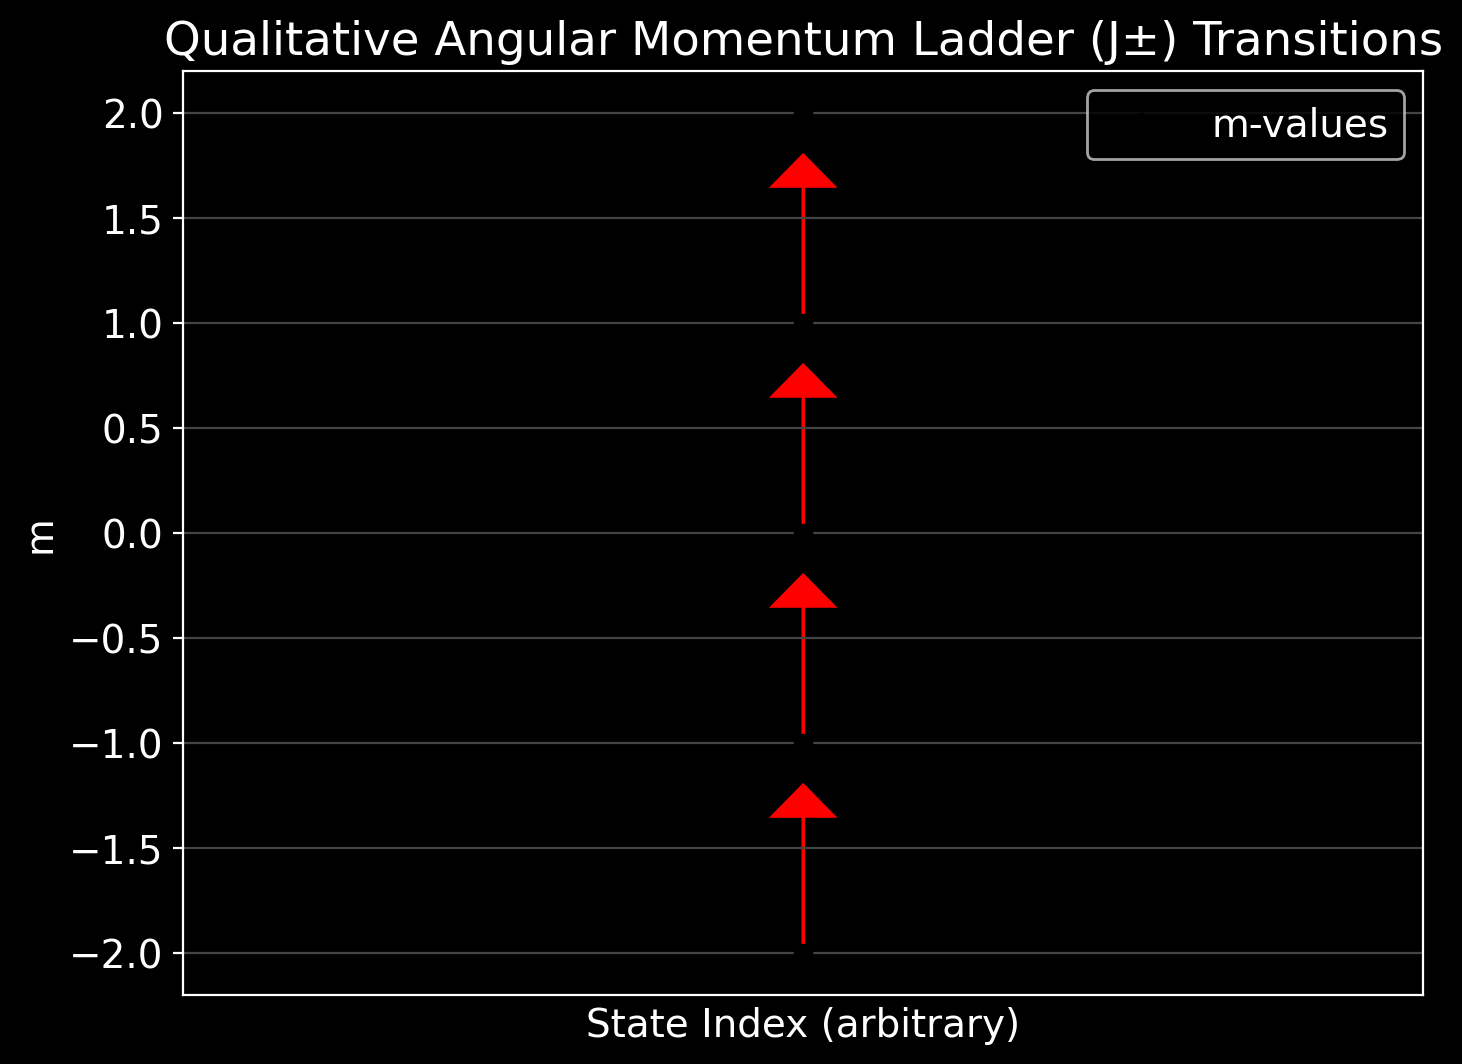

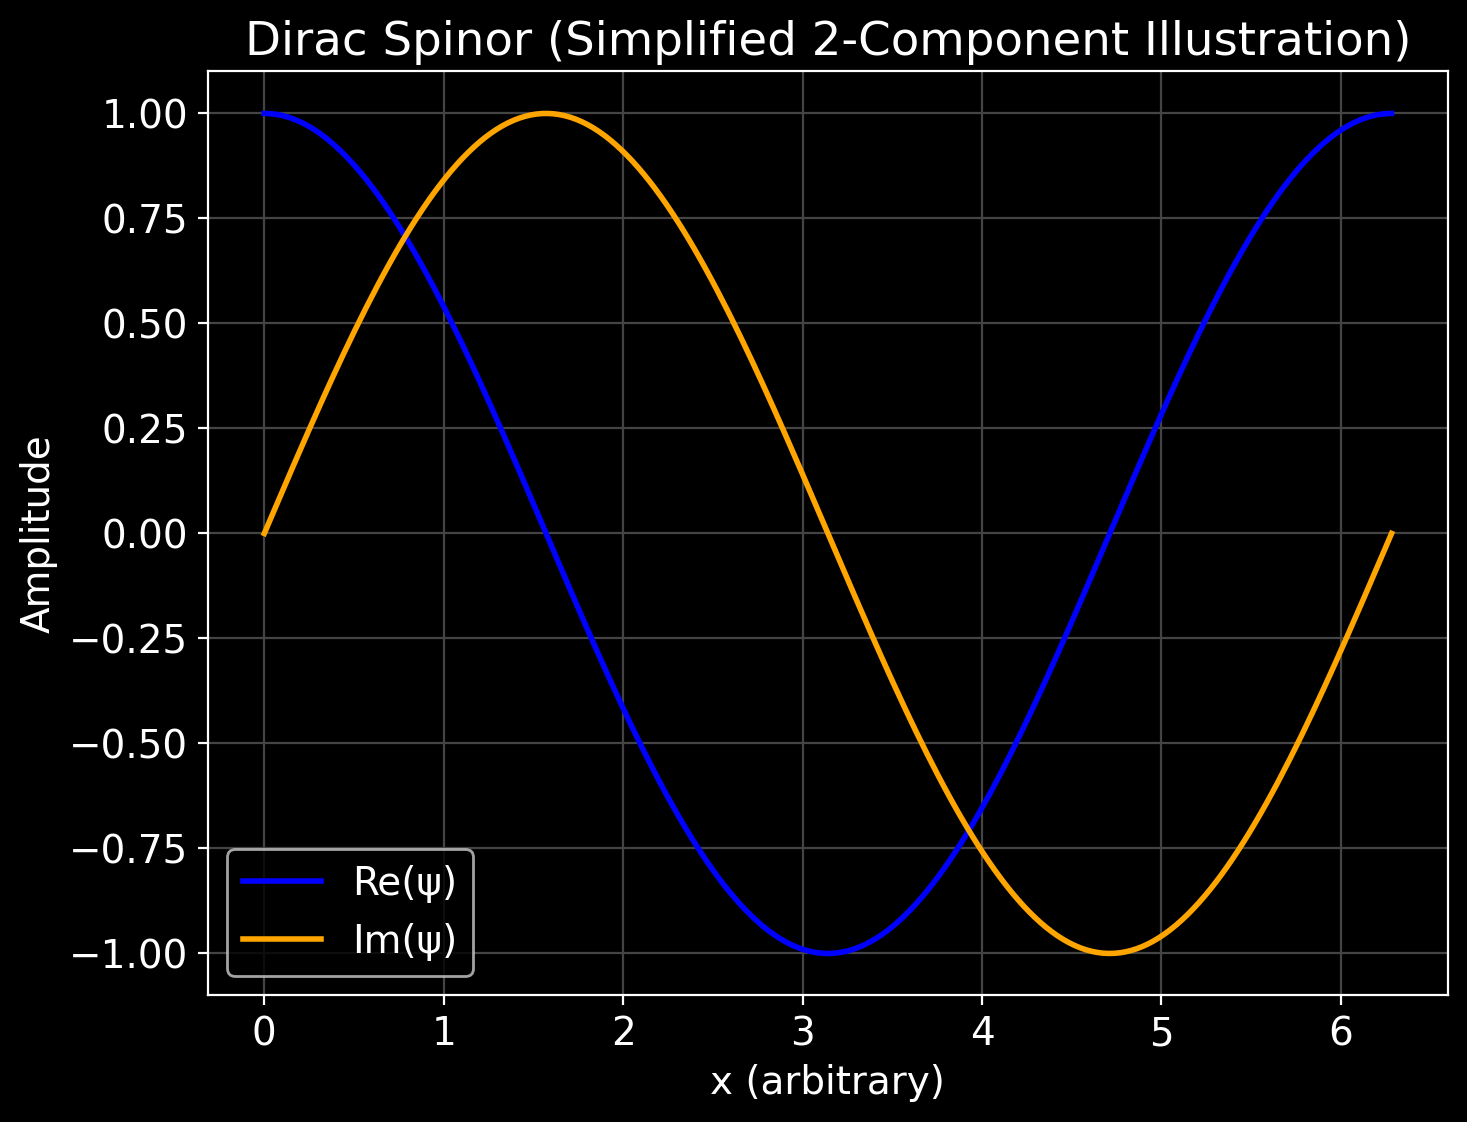

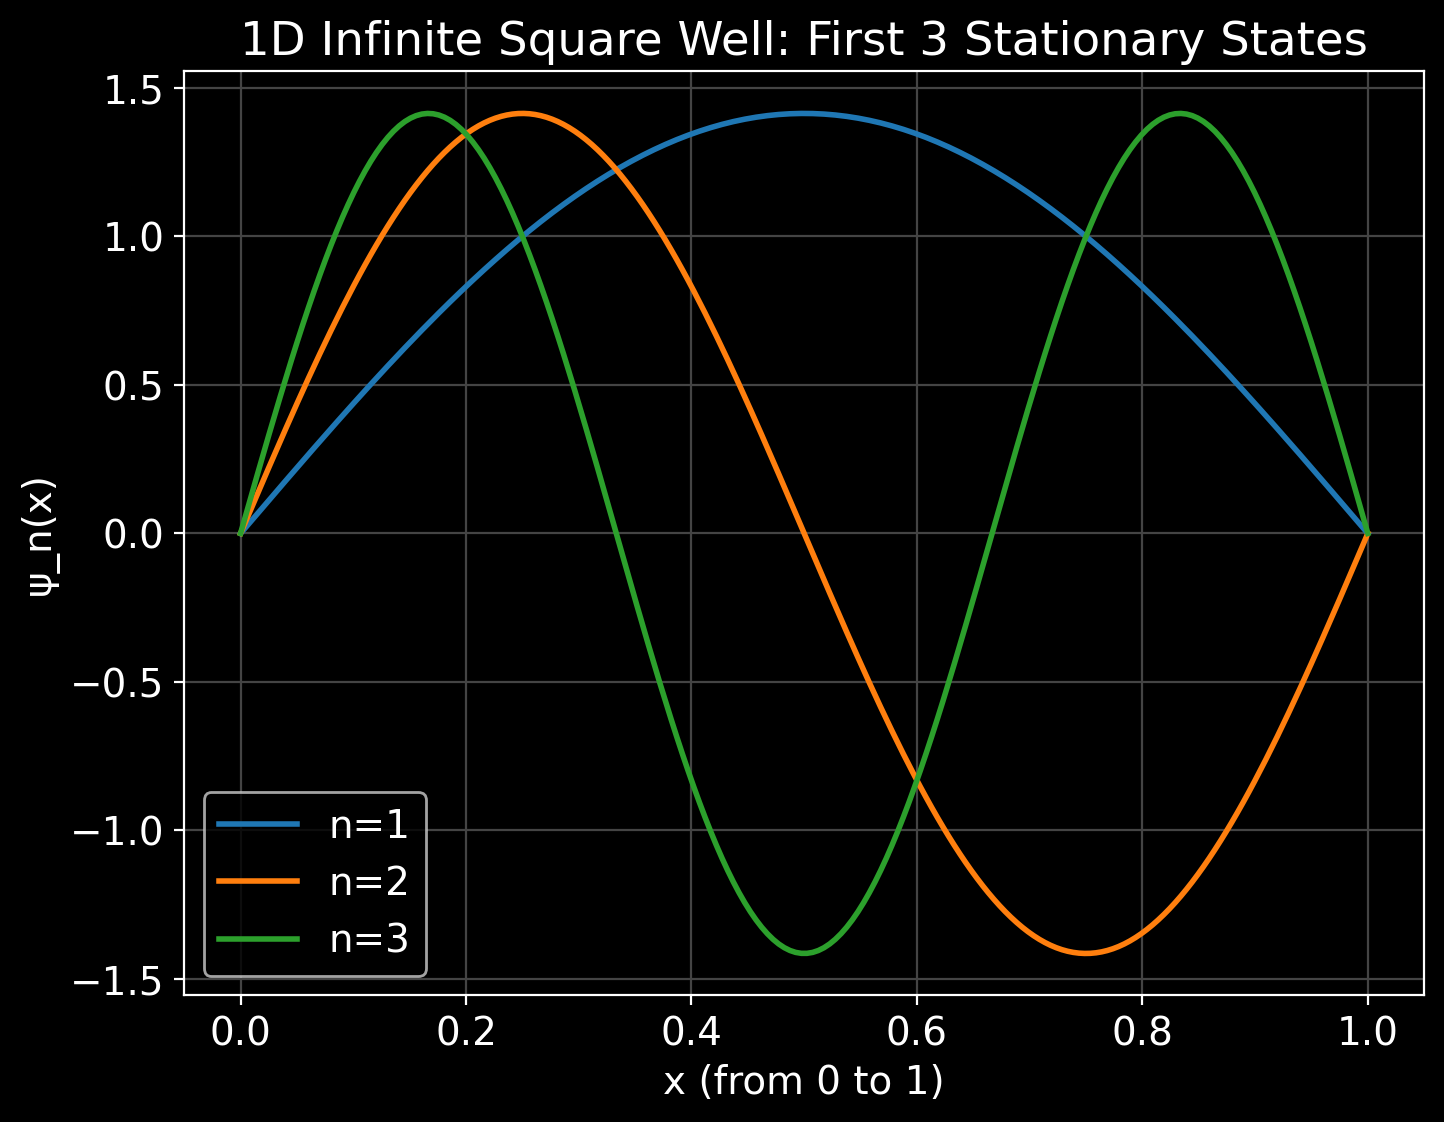

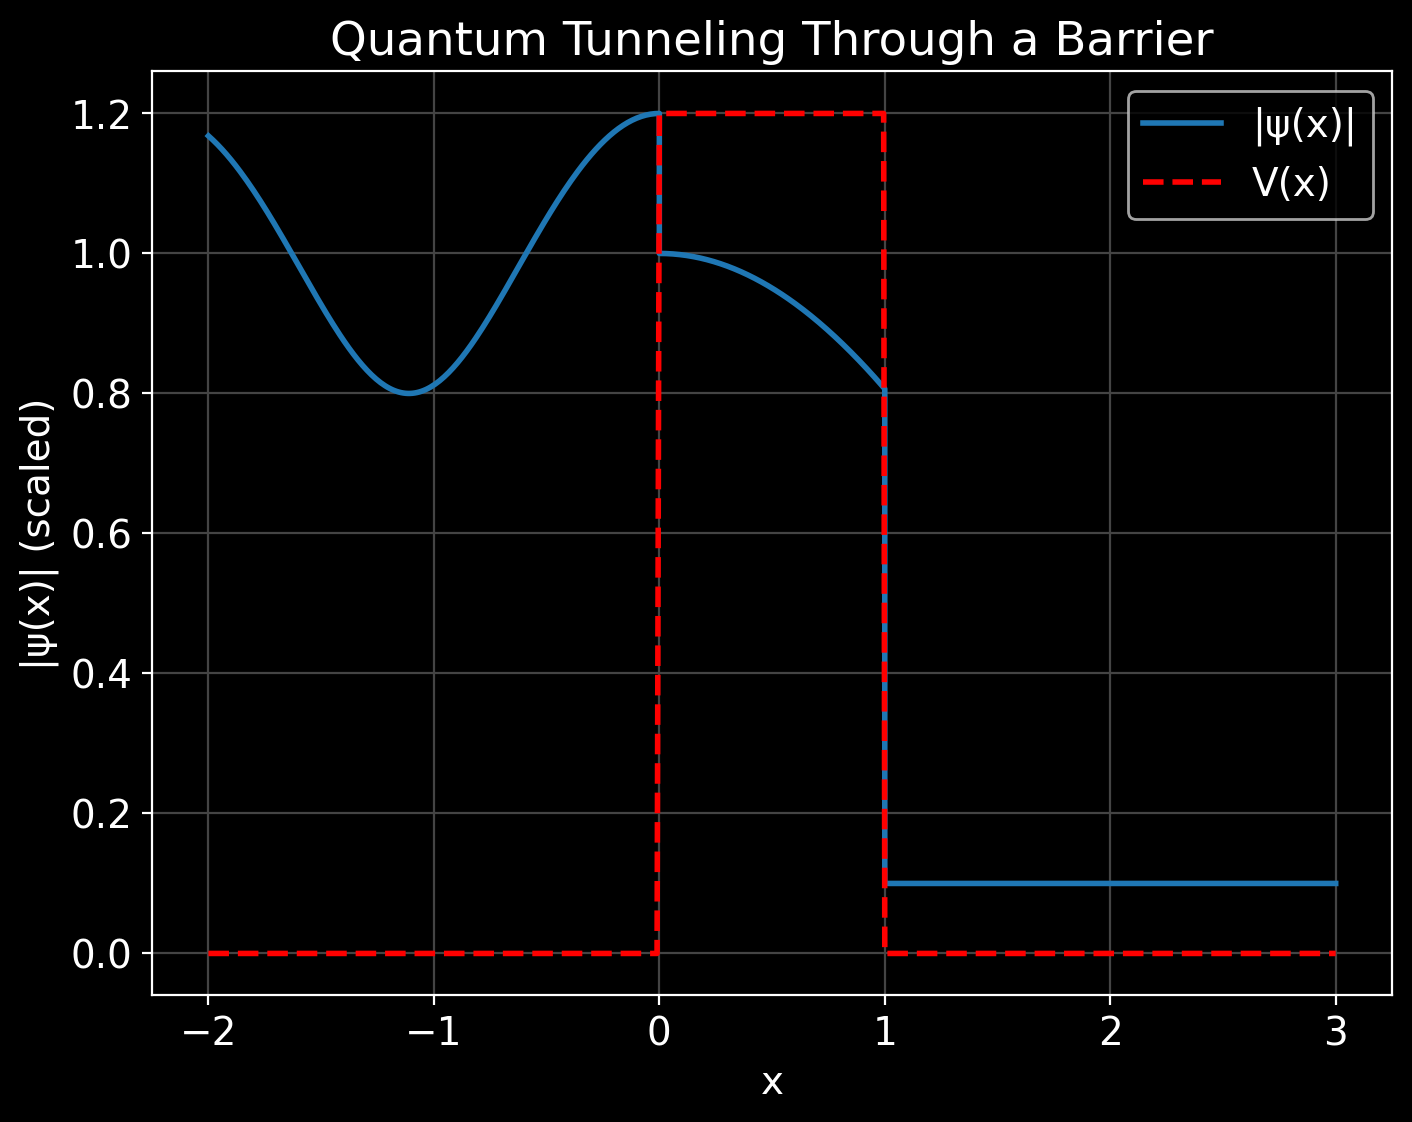

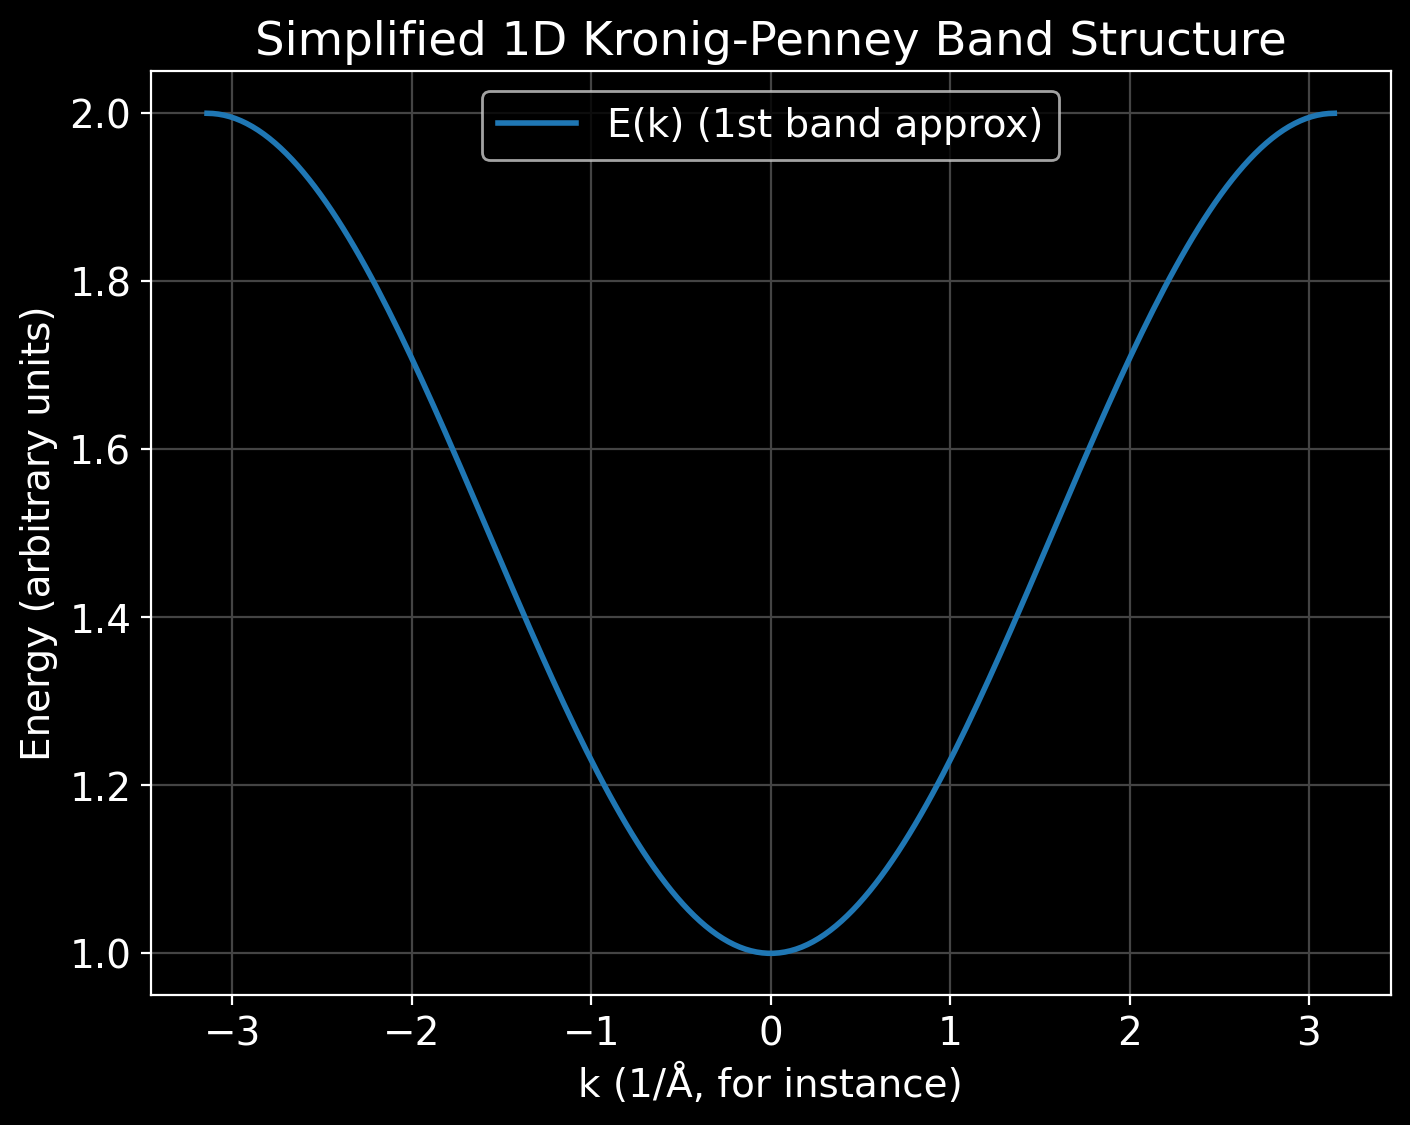

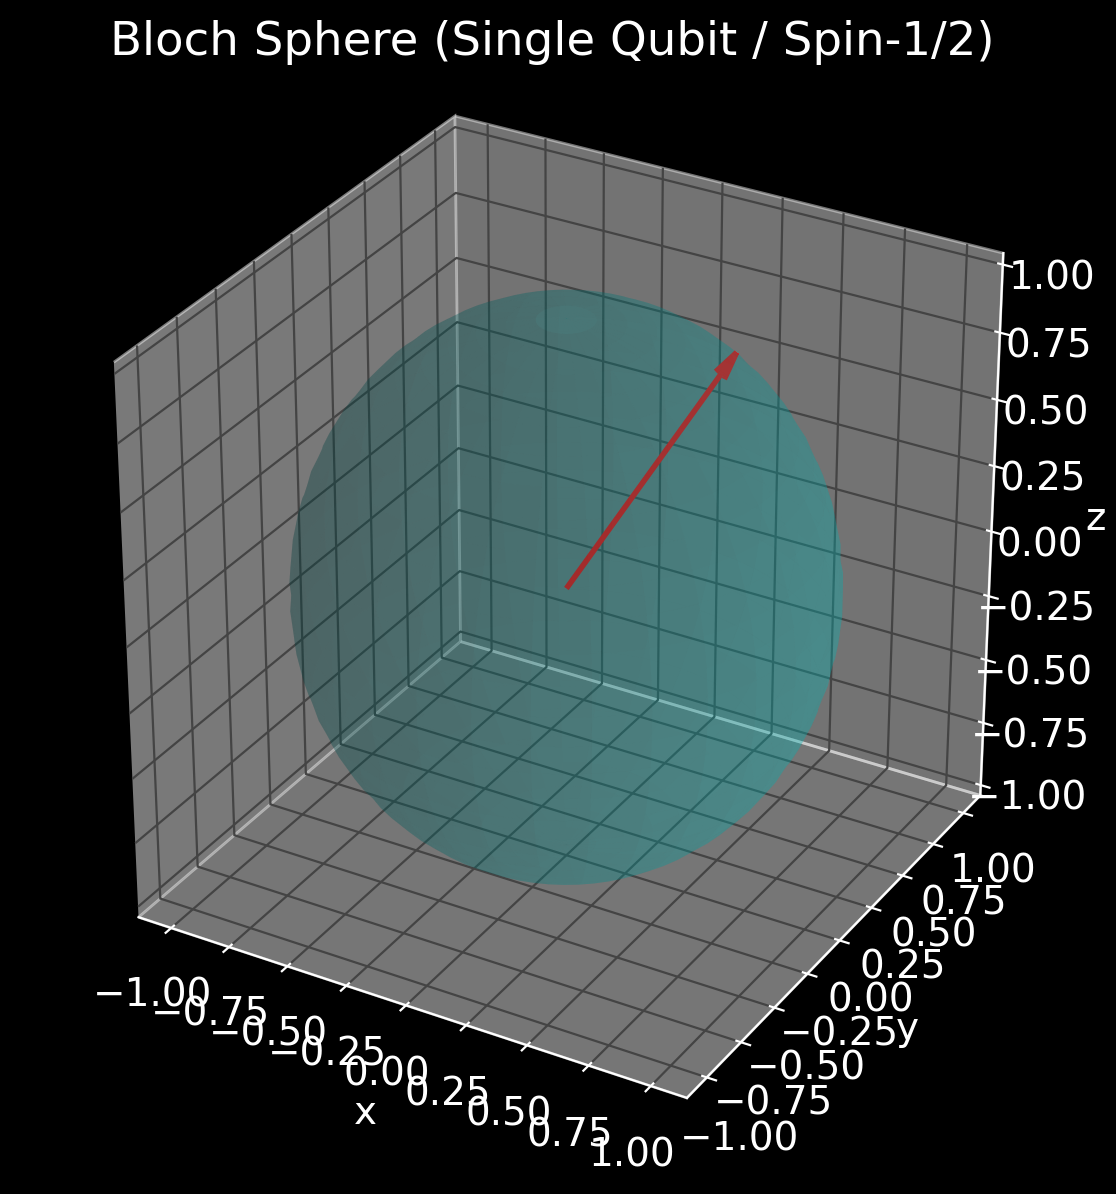

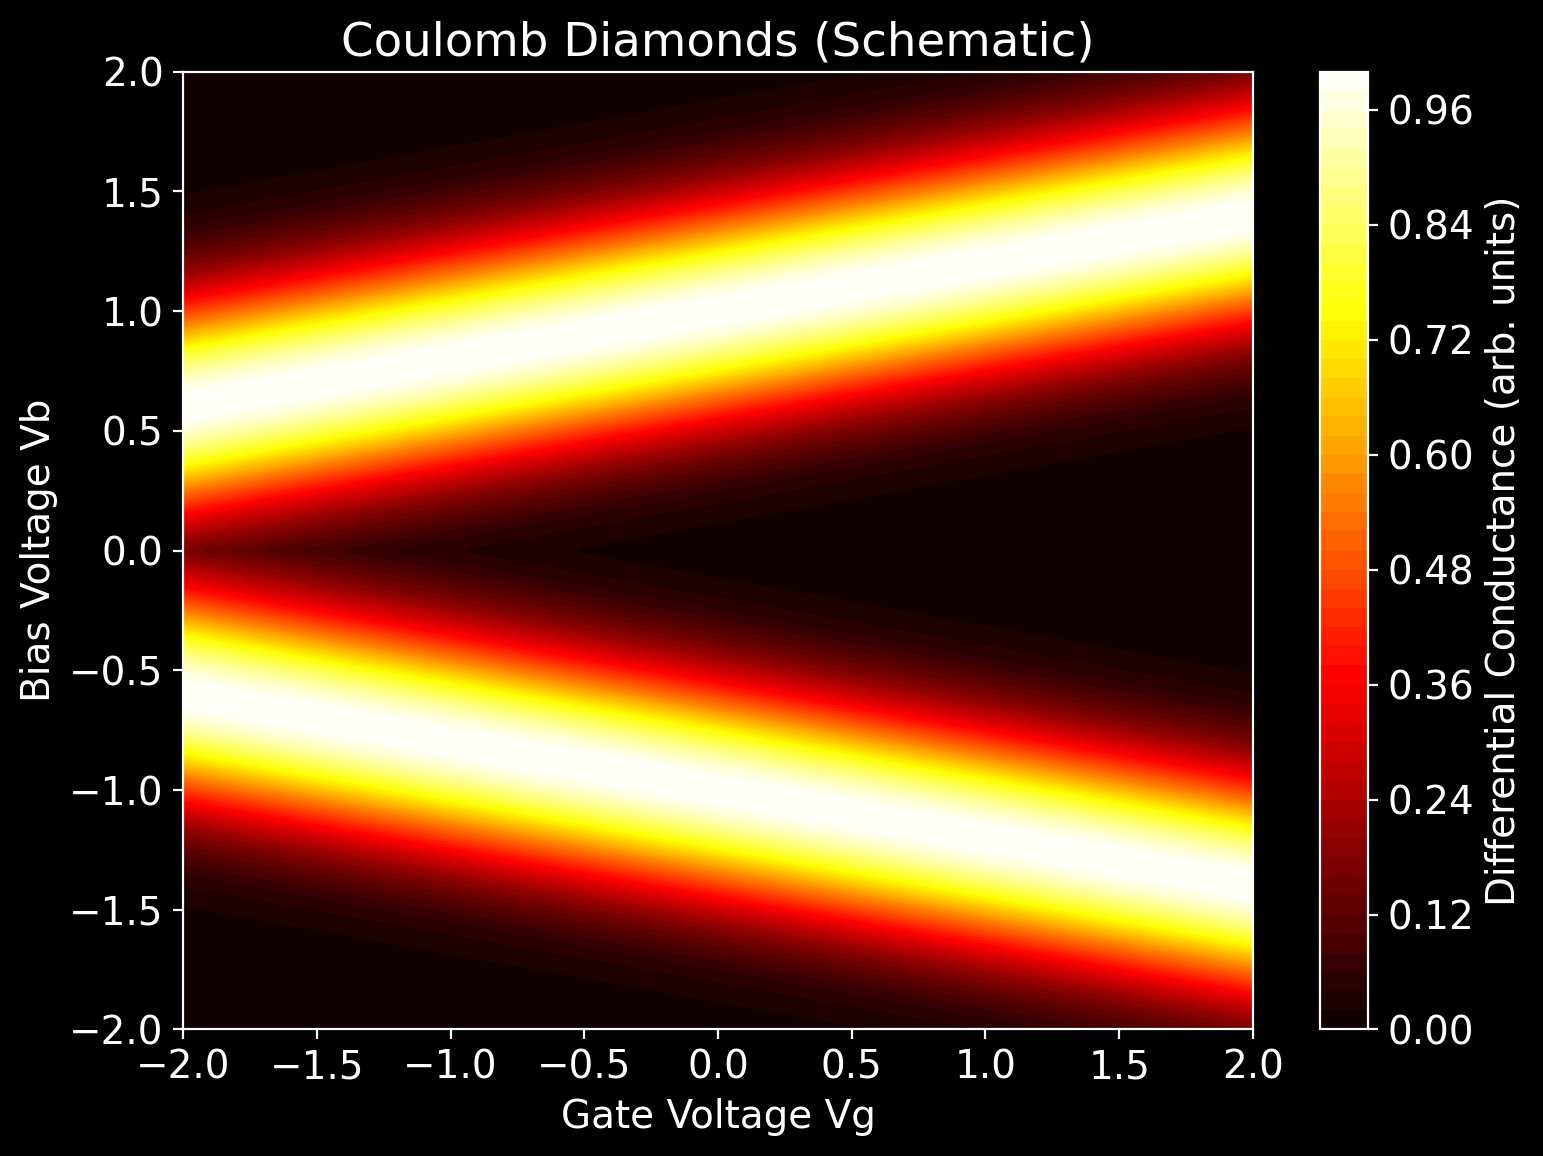

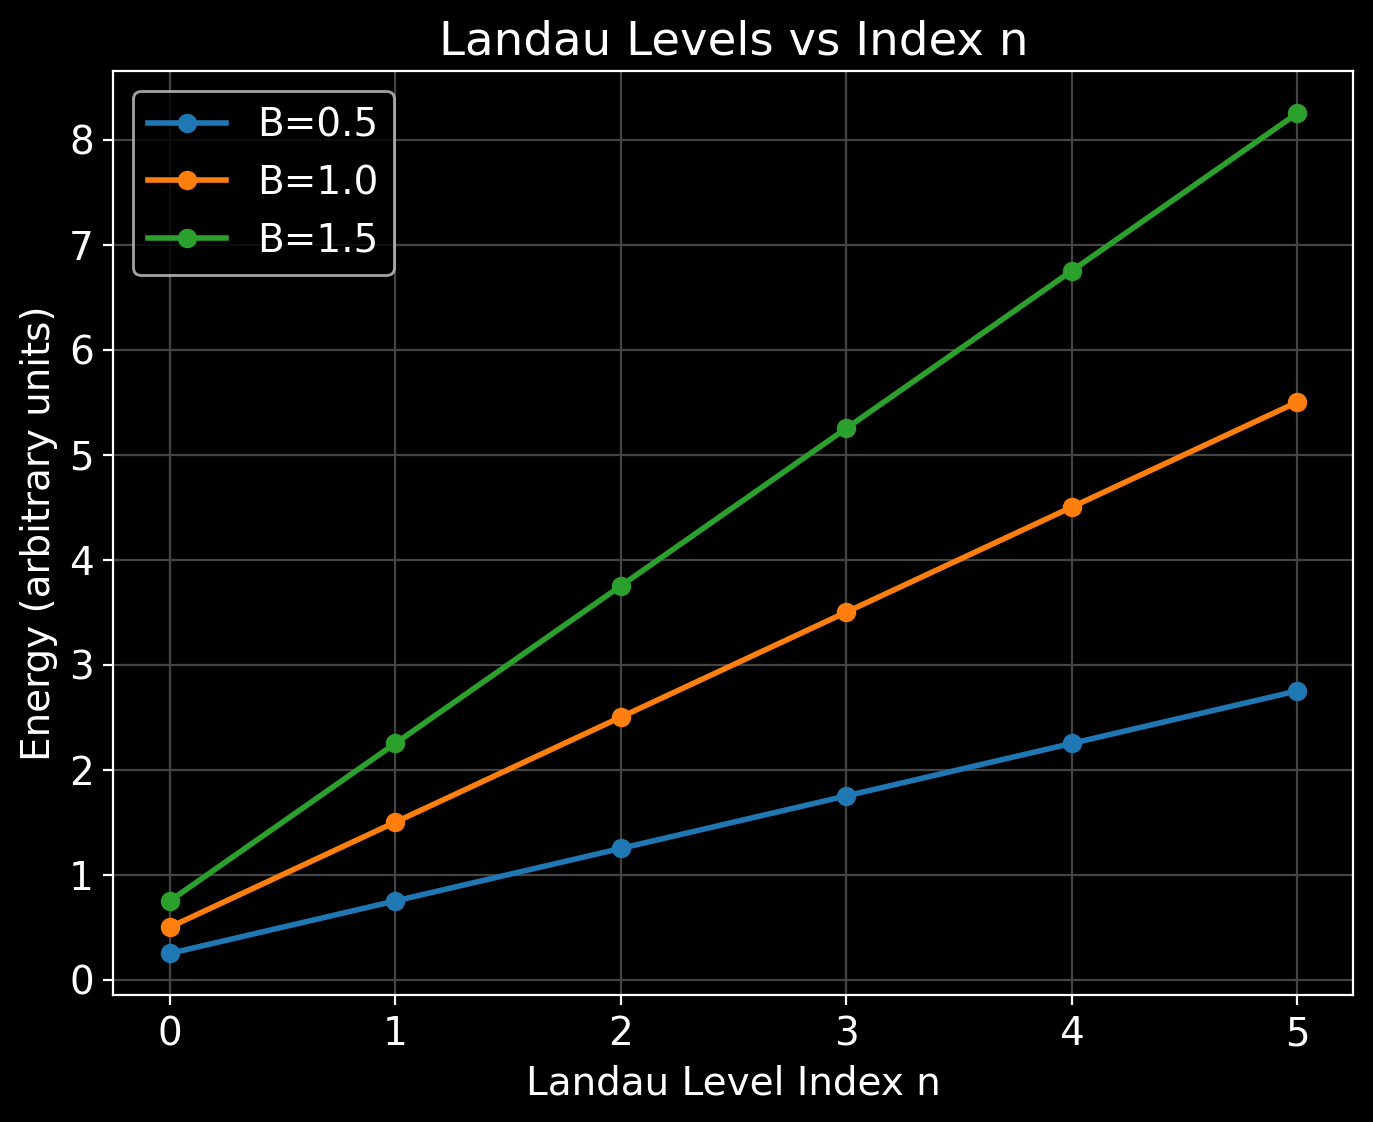

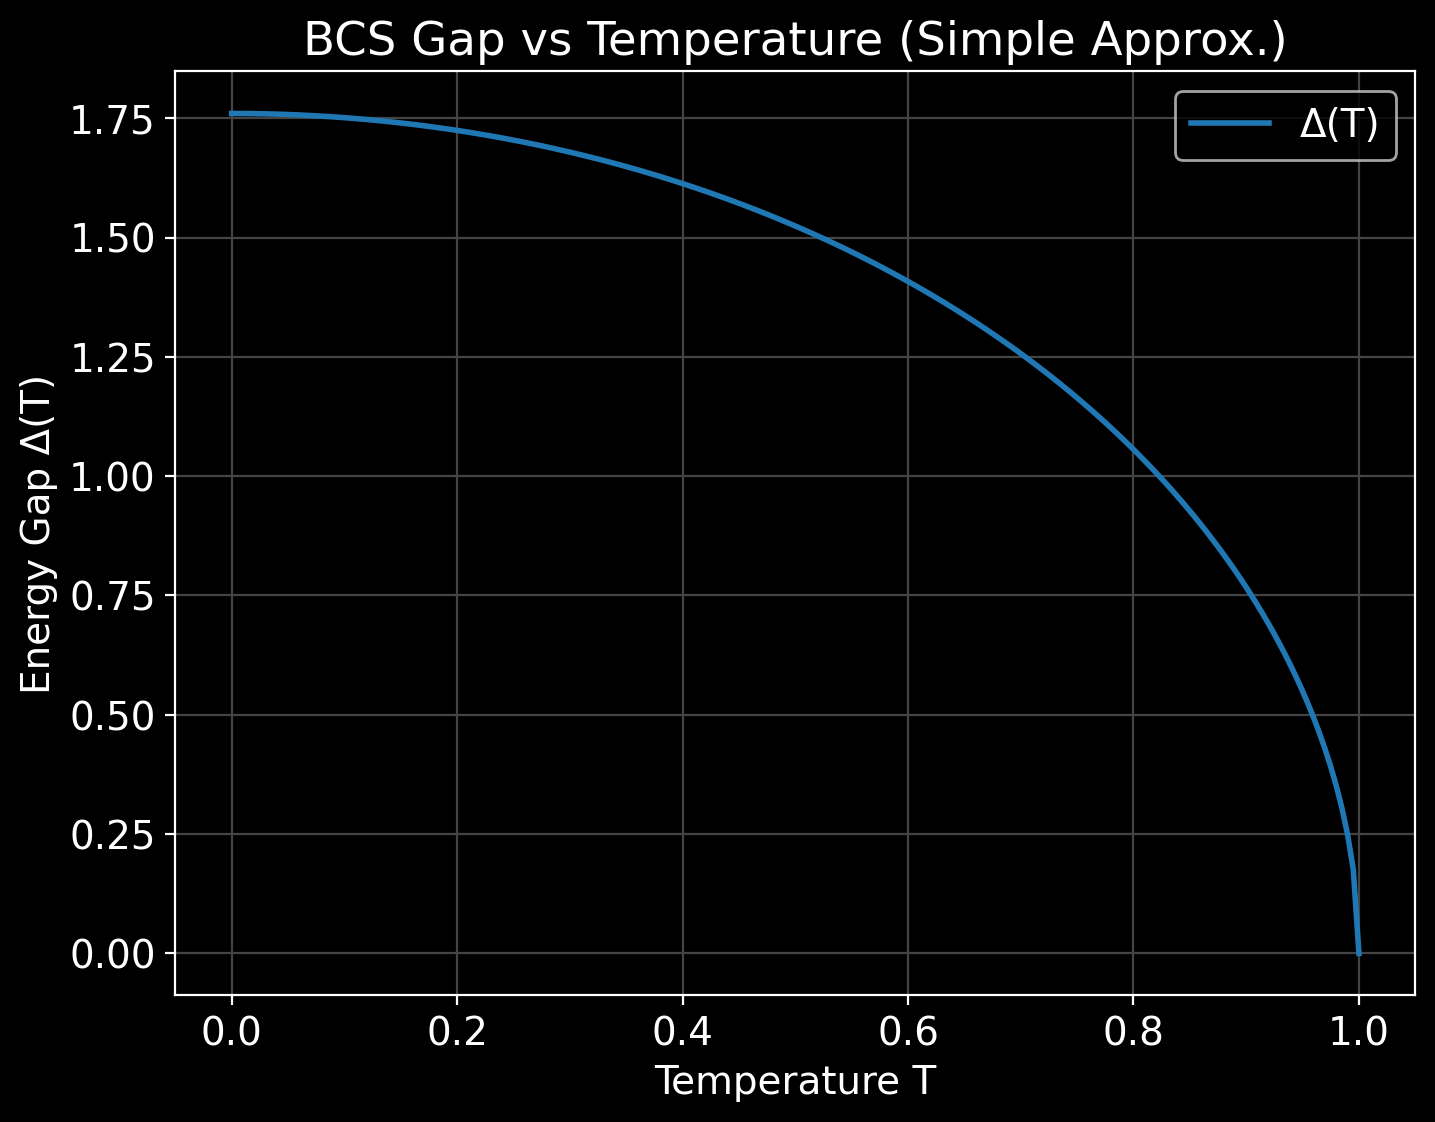

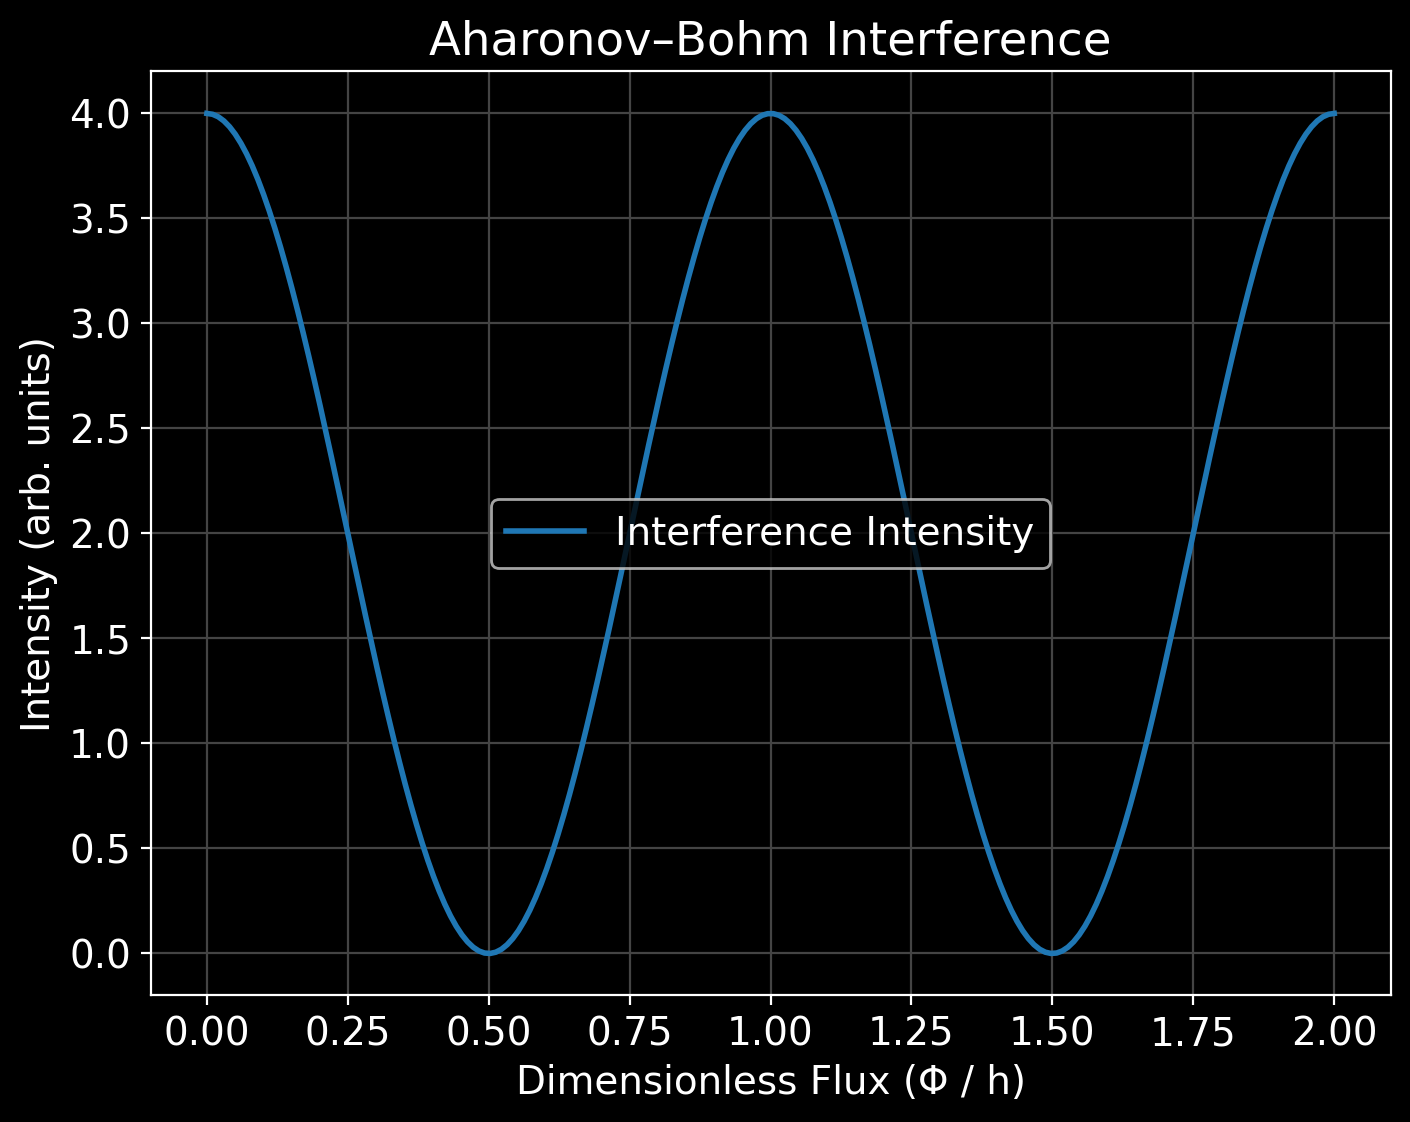

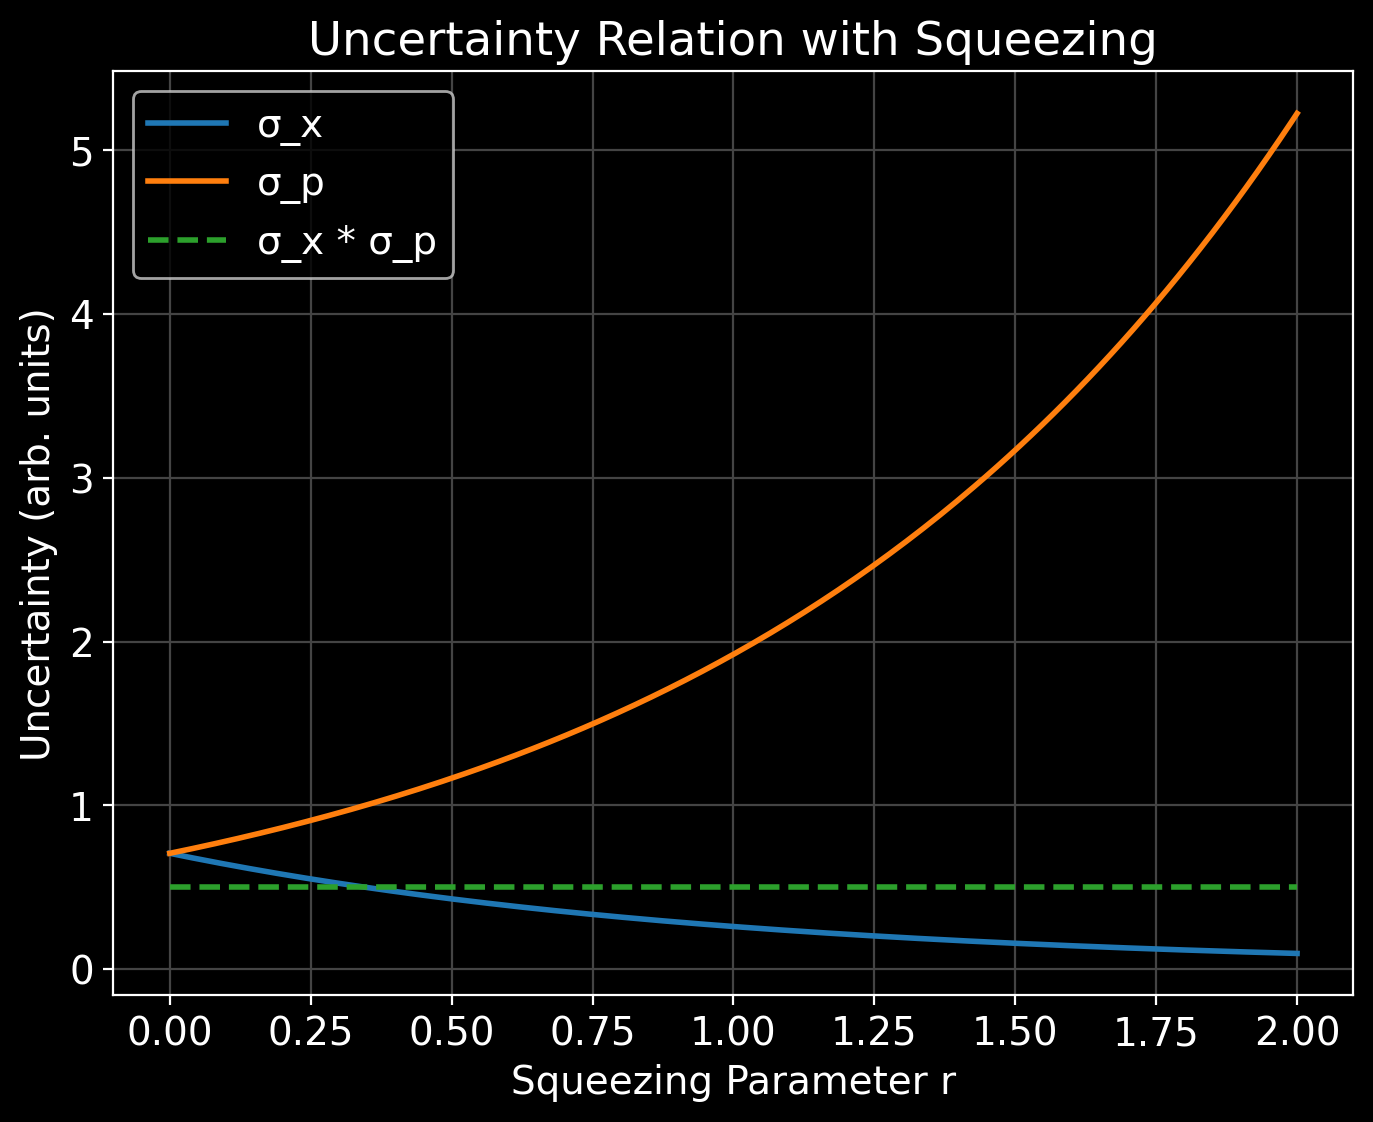

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# ============================================================
# Demonstration Plots for Key Quantum Phenomena
# (Using Lie Algebra & Geometric Algebra Concepts)
# ============================================================

#Each section below provides a brief numerical or graphical demonstration for educational purposes.

import numpy as np
import matplotlib.pyplot as plt


# Onri prefers using rcParams to increase the quality of all plots to be higher than the default settings.
# This only needs to be done once at beginning of every Jupyter Notebook.
plt.rcParams['figure.dpi'] = 200

# High contrast plotting style via rcParams
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.facecolor'] = '#000000'
plt.rcParams['axes.facecolor'] = '#000000'
plt.rcParams['axes.edgecolor'] = '#FFFFFF'
plt.rcParams['axes.labelcolor'] = '#FFFFFF'
plt.rcParams['xtick.color'] = '#FFFFFF'
plt.rcParams['ytick.color'] = '#FFFFFF'
plt.rcParams['text.color'] = '#FFFFFF'
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['grid.color'] = '#444444'

###############################################################################
# 1. Canonical Commutation & Simple Harmonic Oscillator (SHO) wavefunctions
###############################################################################
def plot_sho_wavefunctions():
    """
    Demonstrates the eigenfunctions of the 1D Quantum Harmonic Oscillator.
    While the canonical commutation relations [x, p] = iħ underlie this system,
    here we simply plot the lowest three stationary states (n=0,1,2).
    """
    from math import factorial, sqrt
    from scipy.special import hermite

    x = np.linspace(-4, 4, 400)

    # Define physical constants (choose ħ = m = ω = 1 for simplicity)
    def psi_n(n, x):
        """ Returns the n-th normalized wavefunction of 1D SHO (ħ = m = ω = 1). """
        Hn = hermite(n)
        prefactor = 1.0 / np.sqrt((2**n) * factorial(n) * np.sqrt(np.pi))
        return prefactor * np.exp(-x**2/2) * Hn(x)

    # Plot the wavefunctions
    fig, ax = plt.subplots()
    for n in range(3):
        y = psi_n(n, x)
        ax.plot(x, y, label=f'n={n}')
    ax.set_title('Quantum SHO Wavefunctions (n=0,1,2)')
    ax.set_xlabel('x (dimensionless)')
    ax.set_ylabel('ψ_n(x)')
    ax.legend(loc='upper right')
    ax.grid(True)

###############################################################################
# 2. Angular Momentum: Ladder Operators (Qualitative)
###############################################################################
def plot_ladder_operators():
    """
    Qualitative demonstration of angular momentum ladder operators J+ and J-.
    We'll just show discrete 'm' values as an example, emphasizing how
    J+ and J- move you between adjacent 'm' states for a fixed 'l'.

    NOTE: This is a schematic, not a numeric solution.
    """
    m_vals = np.array([-2, -1, 0, 1, 2])
    Jz = m_vals  # placeholding for Jz eigenvalues

    fig, ax = plt.subplots()

    # Plot discrete 'm' values on a vertical axis
    ax.plot([0]*len(m_vals), Jz, 'ko', label='m-values')

    # Arrows to represent J+ and J- transitions
    for i in range(len(m_vals) - 1):
        ax.arrow(0, m_vals[i], 0, m_vals[i+1] - m_vals[i] - 0.2,
                 head_width=0.1, length_includes_head=True, color='red')

    ax.set_title('Qualitative Angular Momentum Ladder (J±) Transitions')
    ax.set_xlabel('State Index (arbitrary)')
    ax.set_ylabel('m')
    ax.set_xticks([])
    ax.grid(True)
    ax.legend()
    ax.set_xlim(-1, 1)

###############################################################################
# 3. Geometric Algebra & Dirac Spinor (Schematic)
###############################################################################
def plot_dirac_spinor():
    """
    Schematic plot showing the real and imaginary parts of a Dirac spinor component.
    In practice, Dirac spinors are 4-component objects. Here, we show a simplified
    "two-component" real and imaginary part for demonstration.
    """
    x = np.linspace(0, 2*np.pi, 200)
    # Example wavefunction components:
    psi_real = np.cos(x)
    psi_imag = np.sin(x)

    fig, ax = plt.subplots()
    ax.plot(x, psi_real, label='Re(ψ)', color='blue')
    ax.plot(x, psi_imag, label='Im(ψ)', color='orange')
    ax.set_title('Dirac Spinor (Simplified 2-Component Illustration)')
    ax.set_xlabel('x (arbitrary)')
    ax.set_ylabel('Amplitude')
    ax.legend()
    ax.grid(True)

###############################################################################
# 4. Schrödinger Equation: Infinite Square Well
###############################################################################
def plot_infinite_square_well():
    """
    Plots a few eigenstates of the 1D infinite square well (0 < x < a).
    We'll choose a = 1 for simplicity.
    """
    x = np.linspace(0, 1, 200)

    fig, ax = plt.subplots()
    for n in [1, 2, 3]:
        psi_n = np.sqrt(2.0) * np.sin(n * np.pi * x)  # normalized for a=1
        ax.plot(x, psi_n, label=f'n={n}')

    ax.set_title("1D Infinite Square Well: First 3 Stationary States")
    ax.set_xlabel("x (from 0 to 1)")
    ax.set_ylabel("ψ_n(x)")
    ax.legend()
    ax.grid(True)

###############################################################################
# 5. Quantum Tunneling: 1D Potential Barrier
###############################################################################
def plot_tunneling():
    """
    Demonstrates a simple 1D tunneling scenario using the transfer matrix method
    or a direct piecewise solution. We'll just plot the magnitude of the wavefunction.
    """
    from scipy.integrate import odeint

    # Define parameters
    E = 1.0     # Energy
    V0 = 1.2    # Barrier potential
    a = 1.0     # Barrier width
    m = 1.0     # mass
    hbar = 1.0

    # Region definitions
    x_left = np.linspace(-2, 0, 200)
    x_bar = np.linspace(0, a, 200)
    x_right = np.linspace(a, 3, 200)

    k1 = np.sqrt(2*m*E)/hbar
    k2 = np.sqrt(2*m*(V0 - E))/hbar if E < V0 else np.sqrt(2*m*(E - V0))/hbar
    k3 = k1

    # For simplicity, assume piecewise wavefunction with continuity. We'll do a
    # naive approach here to illustrate shape (not a rigorous boundary matching).
    # Left region (free, traveling to the right):
    psi_left = np.exp(1j*k1*x_left) + np.exp(-1j*k1*x_left)*0.2
    # Barrier region (evanescent or oscillatory):
    if E < V0:
        psi_bar = (np.exp(k2*1j*x_bar)+np.exp(-k2*1j*x_bar))*0.5
    else:
        # Over-barrier case
        psi_bar = np.exp(1j*k2*x_bar)*0.5 + np.exp(-1j*k2*x_bar)*0.2
    # Right region (transmitted wave):
    psi_right = np.exp(1j*k3*x_right)*0.1

    # Concatenate x and psi for plotting
    x_all = np.concatenate([x_left, x_bar, x_right])
    psi_all = np.concatenate([psi_left, psi_bar, psi_right])

    fig, ax = plt.subplots()
    ax.plot(x_all, np.abs(psi_all), label='|ψ(x)|')

    # Potential Barrier Outline
    barrier = [0 if xx < 0 else V0 if xx < a else 0 for xx in x_all]
    ax.plot(x_all, barrier, 'r--', label='V(x)')

    ax.set_title("Quantum Tunneling Through a Barrier")
    ax.set_xlabel("x")
    ax.set_ylabel("|ψ(x)| (scaled)")
    ax.legend()
    ax.grid(True)

###############################################################################
# 6. Electronic Band Structure: Kronig-Penney Model (Simplified)
###############################################################################
def plot_kronig_penney():
    """
    Demonstrates (very crudely) the formation of energy bands in a 1D periodic
    potential. We'll do a simplified Kronig-Penney approach and show E(k).
    """
    k_vals = np.linspace(-np.pi, np.pi, 200)

    # Model parameters
    # For demonstration, let's pick some simple polynomial or trigonometric relation
    # that mimics band gap openings.
    def E_k(k):
        return 1 + 0.5*(1 - np.cos(k))  # artificially introduced gap-like shape

    # Plot
    fig, ax = plt.subplots()
    ax.plot(k_vals, E_k(k_vals), label="E(k) (1st band approx)")
    ax.set_title("Simplified 1D Kronig-Penney Band Structure")
    ax.set_xlabel("k (1/Å, for instance)")
    ax.set_ylabel("Energy (arbitrary units)")
    ax.legend()
    ax.grid(True)

###############################################################################
# 7. Spinors: Bloch Sphere Parameterization (Pauli Spin-1/2)
###############################################################################
def plot_bloch_sphere():
    """
    Plots a 3D Bloch sphere with a single spin-1/2 state vector for illustration.
    """
    import mpl_toolkits.mplot3d as m3d

    # Generate sphere coordinates
    phi = np.linspace(0, 2*np.pi, 60)
    theta = np.linspace(0, np.pi, 30)
    phi, theta = np.meshgrid(phi, theta)
    x_sphere = np.sin(theta)*np.cos(phi)
    y_sphere = np.sin(theta)*np.sin(phi)
    z_sphere = np.cos(theta)

    # Example state with angles
    alpha = np.pi/4   # polar
    beta  = np.pi/3   # azimuth
    x_vec = np.sin(alpha)*np.cos(beta)
    y_vec = np.sin(alpha)*np.sin(beta)
    z_vec = np.cos(alpha)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_sphere, y_sphere, z_sphere, color='c', alpha=0.2)

    # Plot the state vector
    ax.quiver(0,0,0, x_vec, y_vec, z_vec, color='r', linewidth=2, arrow_length_ratio=0.1)

    ax.set_title("Bloch Sphere (Single Qubit / Spin-1/2)")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    # For better viewing
    ax.set_box_aspect((1,1,1))
    plt.tight_layout()

###############################################################################
# 8. Coulomb Diamonds (Qualitative Plot)
###############################################################################
def plot_coulomb_diamonds():
    """
    Creates a qualitative "Coulomb Diamond" plot in the differential conductance map
    vs gate voltage (Vg) and bias voltage (Vb).
    Real data are typically measured; here we just create a schematic pattern.
    """
    # Create a meshgrid for Vg and Vb
    Vg = np.linspace(-2, 2, 200)
    Vb = np.linspace(-2, 2, 200)
    Vg_grid, Vb_grid = np.meshgrid(Vg, Vb)

    # Construct a simple "diamond" function
    # We'll define multiple edges for blockaded regions:
    diamond = np.exp(-((np.abs(Vb_grid) - 1 - 0.2*Vg_grid)**2)/0.2)  # just synthetic

    fig, ax = plt.subplots()
    c = ax.contourf(Vg_grid, Vb_grid, diamond, levels=50, cmap='hot')
    plt.colorbar(c, ax=ax, label='Differential Conductance (arb. units)')
    ax.set_title("Coulomb Diamonds (Schematic)")
    ax.set_xlabel("Gate Voltage Vg")
    ax.set_ylabel("Bias Voltage Vb")
    plt.tight_layout()

###############################################################################
# 9. Quantum Hall Effect: Landau Levels
###############################################################################
def plot_landau_levels():
    """
    Plots Landau levels E_n = ħω_c(n + 1/2) vs n for different B fields.
    We'll treat B as a parameter that changes ω_c = eB/m.
    """
    n_vals = np.arange(0, 6)
    # constants
    hbar = 1.0
    e = 1.0
    m = 1.0

    fig, ax = plt.subplots()

    for B in [0.5, 1.0, 1.5]:
        omega_c = e*B/m
        E = hbar*omega_c*(n_vals + 0.5)
        ax.plot(n_vals, E, 'o-', label=f'B={B}')

    ax.set_title("Landau Levels vs Index n")
    ax.set_xlabel("Landau Level Index n")
    ax.set_ylabel("Energy (arbitrary units)")
    ax.legend()
    ax.grid(True)

###############################################################################
# 10. Superconductivity: BCS Gap vs Temperature
###############################################################################
def plot_bcs_gap():
    """
    Demonstrates the temperature dependence of the superconducting gap Δ(T).
    A common approximation near Tc is Δ(T) ~ Δ(0)*sqrt(1 - T/Tc).
    We'll just illustrate that shape.
    """
    Tc = 1.0   # critical temperature (arbitrary units)
    T = np.linspace(0, Tc, 200)
    Delta0 = 1.76  # typical ratio in BCS at T=0 (in units of k_B Tc, simplified)

    Delta = Delta0 * np.sqrt(1 - (T/Tc)**2)

    fig, ax = plt.subplots()
    ax.plot(T, Delta, label='Δ(T)')
    ax.set_title("BCS Gap vs Temperature (Simple Approx.)")
    ax.set_xlabel("Temperature T")
    ax.set_ylabel("Energy Gap Δ(T)")
    ax.grid(True)
    ax.legend()

###############################################################################
# 11. Quantum Interference: Aharonov–Bohm Phase
###############################################################################
def plot_aharonov_bohm():
    """
    Demonstrates the phase shift Δφ = (q/ħ)*Φ for an electron
    going around a ring with magnetic flux Φ. We'll plot
    wave interference intensities vs flux.
    """
    # For simplicity, let phi = flux/h (dimensionless)
    # Interference intensity ~ |1 + e^(i * 2π * phi)|^2, for example
    phi_vals = np.linspace(0, 2, 200)  # in units of flux/h
    intensity = np.abs(1 + np.exp(1j*2*np.pi*phi_vals))**2

    fig, ax = plt.subplots()
    ax.plot(phi_vals, intensity, label='Interference Intensity')
    ax.set_title("Aharonov–Bohm Interference")
    ax.set_xlabel("Dimensionless Flux (Φ / h)")
    ax.set_ylabel("Intensity (arb. units)")
    ax.grid(True)
    ax.legend()

###############################################################################
# 12. Standard Quantum Limit & Uncertainty
###############################################################################
def plot_uncertainty_principle():
    """
    Plots the product of uncertainties σ_x * σ_p vs squeezing parameter r,
    showing how nonclassical states (like squeezed states) can partially reduce
    one uncertainty at the expense of the other.
    """
    # Squeezing parameter r in [0, 2] for demonstration
    r_vals = np.linspace(0, 2, 200)
    # For a standard squeezed state:
    # σ_x = (1/√2) e^{-r}, σ_p = (1/√2) e^{r}
    # => product = 1/2 (constant = ħ/2 if we set ħ=1).
    sigma_x = (1/np.sqrt(2))*np.exp(-r_vals)
    sigma_p = (1/np.sqrt(2))*np.exp(r_vals)
    product = sigma_x * sigma_p  # ideally = 1/2

    fig, ax = plt.subplots()
    ax.plot(r_vals, sigma_x, label='σ_x')
    ax.plot(r_vals, sigma_p, label='σ_p')
    ax.plot(r_vals, product, label='σ_x * σ_p', linestyle='--')
    ax.set_title("Uncertainty Relation with Squeezing")
    ax.set_xlabel("Squeezing Parameter r")
    ax.set_ylabel("Uncertainty (arb. units)")
    ax.legend()
    ax.grid(True)


###############################################################################
# Main execution
###############################################################################
def main():
    """
    Run each demo plot in succession. You can comment/uncomment as desired.
    """
    plot_sho_wavefunctions()
    plot_ladder_operators()
    plot_dirac_spinor()
    plot_infinite_square_well()
    plot_tunneling()
    plot_kronig_penney()
    plot_bloch_sphere()
    plot_coulomb_diamonds()
    plot_landau_levels()
    plot_bcs_gap()
    plot_aharonov_bohm()
    plot_uncertainty_principle()

    plt.show()


if __name__ == "__main__":
    main()
